## tanh vs. ReLU
Let's compare how the tanh and ReLU activation functions perform on Fashion-MNIST. We'll make four networks, varying the size (784->30->30->10 or 784->100->100->10) and the inner layers' activation functions (tanh or ReLU).

In [ ]:
from components import *
from modular_network import Network
import fashion_mnist_loader
import matplotlib.pyplot as plt

In [ ]:
# Load data
fmnist_train, fmnist_val, fmnist_test = fashion_mnist_loader.load_data_wrapper("../data")

In [141]:
# After a little bit of experimenting, I don't think data augmentations 
# and regularizations help here. So we won't end up using these objects.
translate = TranslationAug(-2, 2, -2, 2)
noise = RandUniformAug(-0.2, 0.2)
combined = CombinedAug([translate, noise])
reg = L2Regularization(1.5 / 50000)

In [ ]:
# Create a network
tanh30net = Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 30, tanh(), None),
    FullyConnected(30, 30, tanh(), None),
    FullyConnected(30, 10, Softmax(), None)
])

In [ ]:
# Train our network
# Note that the Network.train() method returns the training stats, so we can store it in a variable
tanh30net.set_cost(BinaryCrossEntropyCost())
tanh30net.set_optimizer(Adam_optimizer(0.005, 20, 0.99, 0.999))
tanh30stats_1 = tanh30net.train(fmnist_train, 15, 20, fmnist_val, monitor_test_acc=True)
tanh30net.set_optimizer(Adam_optimizer(0.001, 20, 0.99, 0.999))
tanh30stats_2 = tanh30net.train(fmnist_train, 5, 20, fmnist_val, monitor_test_acc=True)

Epoch 1 training complete, took 1.5733869075775146 seconds
Accuracy on test data: 8106 / 10000
Epoch 2 training complete, took 2.0110530853271484 seconds
Accuracy on test data: 8382 / 10000
Epoch 3 training complete, took 1.9382691383361816 seconds
Accuracy on test data: 8528 / 10000
Epoch 4 training complete, took 2.0454516410827637 seconds
Accuracy on test data: 8587 / 10000
Epoch 5 training complete, took 1.8849163055419922 seconds
Accuracy on test data: 8643 / 10000
Epoch 6 training complete, took 2.1500091552734375 seconds
Accuracy on test data: 8591 / 10000
Epoch 7 training complete, took 1.9732606410980225 seconds
Accuracy on test data: 8690 / 10000
Epoch 8 training complete, took 2.057124376296997 seconds
Accuracy on test data: 8688 / 10000
Epoch 9 training complete, took 2.227485418319702 seconds
Accuracy on test data: 8724 / 10000
Epoch 10 training complete, took 2.2037229537963867 seconds
Accuracy on test data: 8750 / 10000
Epoch 11 training complete, took 2.316366195678711 

In [123]:
relu30net = Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 30, ReLU(), None),
    FullyConnected(30, 30, ReLU(), None),
    FullyConnected(30, 10, Softmax(), None)
])

In [124]:
relu30net.set_cost(BinaryCrossEntropyCost())
relu30net.set_optimizer(Adam_optimizer(0.005, 20, 0.99, 0.999))
relu30stats_1 = relu30net.train(fmnist_train, 15, 20, fmnist_val, monitor_test_acc=True)
relu30net.set_optimizer(Adam_optimizer(0.001, 20, 0.99, 0.999))
relu30stats_2 = relu30net.train(fmnist_train, 5, 20, fmnist_val, monitor_test_acc=True)

Epoch 1 training complete, took 1.1341114044189453 seconds
Accuracy on test data: 8062 / 10000
Epoch 2 training complete, took 1.2802395820617676 seconds
Accuracy on test data: 8297 / 10000
Epoch 3 training complete, took 1.5921385288238525 seconds
Accuracy on test data: 8432 / 10000
Epoch 4 training complete, took 1.622488260269165 seconds
Accuracy on test data: 8494 / 10000
Epoch 5 training complete, took 1.8078608512878418 seconds
Accuracy on test data: 8538 / 10000
Epoch 6 training complete, took 1.6279704570770264 seconds
Accuracy on test data: 8550 / 10000
Epoch 7 training complete, took 1.8946142196655273 seconds
Accuracy on test data: 8569 / 10000
Epoch 8 training complete, took 1.6430323123931885 seconds
Accuracy on test data: 8574 / 10000
Epoch 9 training complete, took 1.7282650470733643 seconds
Accuracy on test data: 8646 / 10000
Epoch 10 training complete, took 1.880359411239624 seconds
Accuracy on test data: 8653 / 10000
Epoch 11 training complete, took 1.668177843093872 

In [125]:
tanh100net = Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 100, tanh(), None),
    FullyConnected(100, 100, tanh(), None),
    FullyConnected(100, 10, Softmax(), None)
])

In [126]:
tanh100net.set_cost(BinaryCrossEntropyCost())
tanh100net.set_optimizer(Adam_optimizer(0.005, 20, 0.99, 0.999))
tanh100stats_1 = tanh100net.train(fmnist_train, 15, 20, fmnist_val, monitor_test_acc=True)
tanh100net.set_optimizer(Adam_optimizer(0.001, 20, 0.99, 0.999))
tanh100stats_2 = tanh100net.train(fmnist_train, 5, 20, fmnist_val, monitor_test_acc=True)

Epoch 1 training complete, took 6.294819355010986 seconds
Accuracy on test data: 8443 / 10000
Epoch 2 training complete, took 7.065088510513306 seconds
Accuracy on test data: 8541 / 10000
Epoch 3 training complete, took 8.541807651519775 seconds
Accuracy on test data: 8735 / 10000
Epoch 4 training complete, took 8.160168170928955 seconds
Accuracy on test data: 8731 / 10000
Epoch 5 training complete, took 8.653072357177734 seconds
Accuracy on test data: 8800 / 10000
Epoch 6 training complete, took 9.160202026367188 seconds
Accuracy on test data: 8792 / 10000
Epoch 7 training complete, took 9.286397457122803 seconds
Accuracy on test data: 8842 / 10000
Epoch 8 training complete, took 9.17040753364563 seconds
Accuracy on test data: 8838 / 10000
Epoch 9 training complete, took 9.168588399887085 seconds
Accuracy on test data: 8868 / 10000
Epoch 10 training complete, took 9.302975177764893 seconds
Accuracy on test data: 8882 / 10000
Epoch 11 training complete, took 8.821354150772095 seconds
A

In [127]:
relu100net = Network([
    Flatten((28, 28)),
    FullyConnected(28*28, 100, ReLU(), None),
    FullyConnected(100, 100, ReLU(), None),
    FullyConnected(100, 10, Softmax(), None)
])

In [128]:
relu100net.set_cost(BinaryCrossEntropyCost())
relu100net.set_optimizer(Adam_optimizer(0.005, 20, 0.99, 0.999))
relu100stats_1 = relu100net.train(fmnist_train, 15, 20, fmnist_val, monitor_test_acc=True)
relu100net.set_optimizer(Adam_optimizer(0.001, 20, 0.99, 0.999))
relu100stats_2 = relu100net.train(fmnist_train, 5, 20, fmnist_val, monitor_test_acc=True)

Epoch 1 training complete, took 8.16566276550293 seconds
Accuracy on test data: 8394 / 10000
Epoch 2 training complete, took 7.296437501907349 seconds
Accuracy on test data: 8564 / 10000
Epoch 3 training complete, took 8.752745389938354 seconds
Accuracy on test data: 8658 / 10000
Epoch 4 training complete, took 8.778499603271484 seconds
Accuracy on test data: 8652 / 10000
Epoch 5 training complete, took 8.600139856338501 seconds
Accuracy on test data: 8703 / 10000
Epoch 6 training complete, took 8.061446905136108 seconds
Accuracy on test data: 8715 / 10000
Epoch 7 training complete, took 8.810863733291626 seconds
Accuracy on test data: 8757 / 10000
Epoch 8 training complete, took 8.397691011428833 seconds
Accuracy on test data: 8797 / 10000
Epoch 9 training complete, took 10.108367443084717 seconds
Accuracy on test data: 8843 / 10000
Epoch 10 training complete, took 10.79500150680542 seconds
Accuracy on test data: 8790 / 10000
Epoch 11 training complete, took 11.565879106521606 seconds

## Results

Since we saved our training statistics, we can plot the accuracy vs. the epoch. We could also plot against elapsed training time, but since the activation function choice didn't seem to impact training time too much, we'll just plot against epoch.

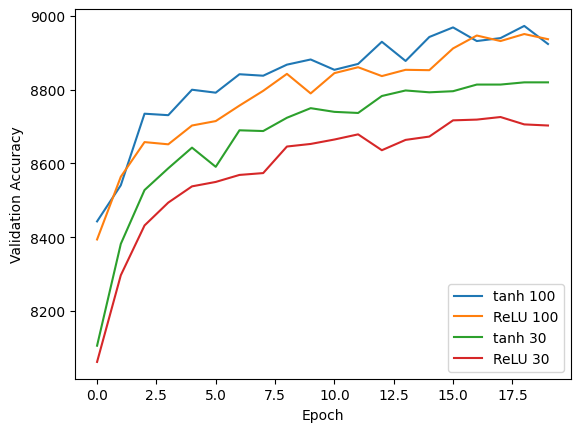

In [143]:
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.plot(tanh100stats_1["test_acc"] + tanh100stats_2["test_acc"], label="tanh 100")
plt.plot(relu100stats_1["test_acc"] + relu100stats_2["test_acc"], label="ReLU 100")
plt.plot(tanh30stats_1["test_acc"] + tanh30stats_2["test_acc"], label="tanh 30")
plt.plot(relu30stats_1["test_acc"] + relu30stats_2["test_acc"], label="ReLU 30")
plt.legend()

Thus concludes our experiment. Overall, it seems like tanh() performs better than ReLU() for the majority of training time, but the 100x100 networks' results are much closer.